# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [2]:
df_raw = pd.read_csv(r"D:\Shubham\Python ML\tripadvisor_review .csv", index_col='User ID')
df_raw.columns = ['art_galleries','dance_clubs','juice_bars','restaurants','museums','resorts',
                 'parks','beaches','theaters','religious_institutions']
df_raw.head()

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks,beaches,theaters,religious_institutions
User ID,,,,,,,,,,
User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, User 1 to User 980
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   art_galleries           980 non-null    float64
 1   dance_clubs             980 non-null    float64
 2   juice_bars              980 non-null    float64
 3   restaurants             980 non-null    float64
 4   museums                 980 non-null    float64
 5   resorts                 980 non-null    float64
 6   parks                   980 non-null    float64
 7   beaches                 980 non-null    float64
 8   theaters                980 non-null    float64
 9   religious_institutions  980 non-null    float64
dtypes: float64(10)
memory usage: 84.2+ KB


# Checking Outliers

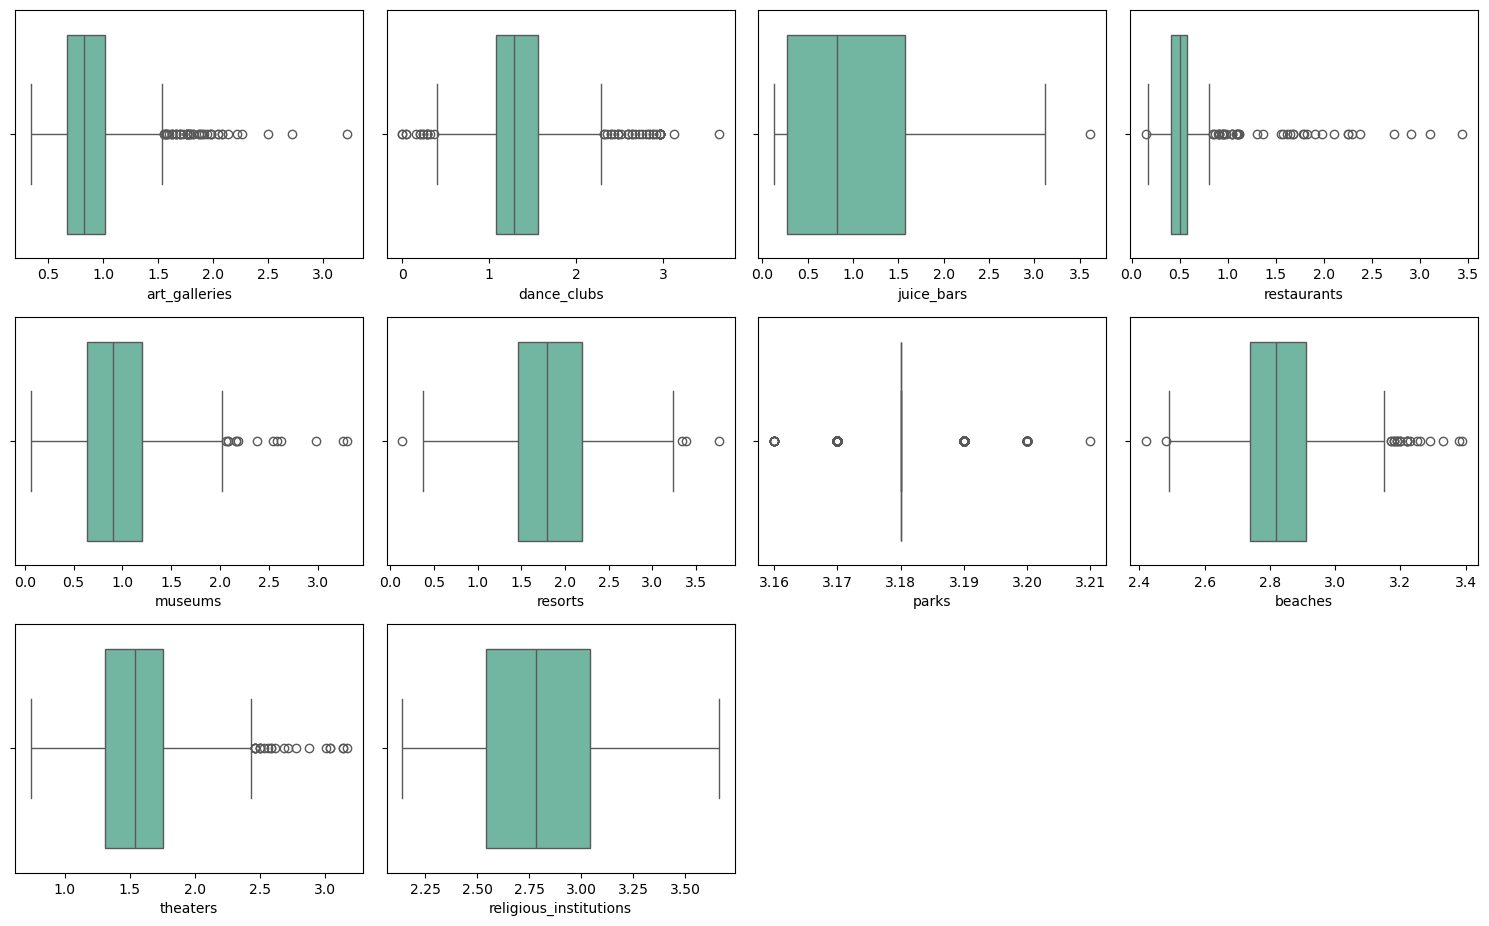

In [4]:
plt.figure(figsize=(15,12))
for value,column in enumerate(df_raw.columns):
    plt.subplot(4,4,value+1)
    sns.boxplot(x=df_raw[column],palette='Set2')
plt.tight_layout()
plt.show()

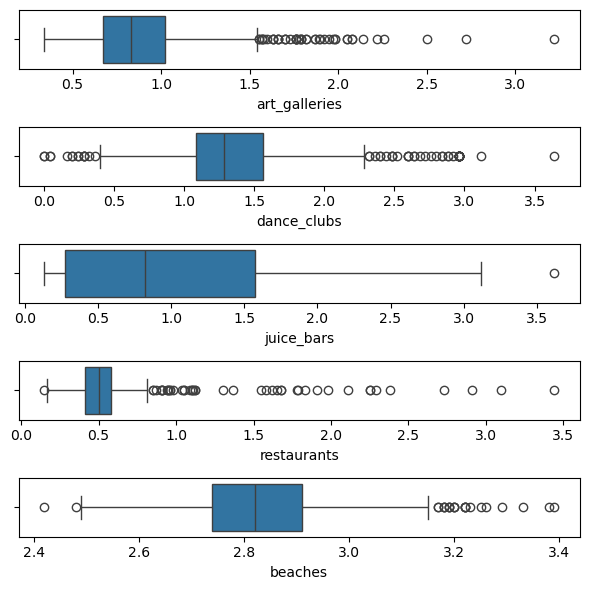

In [5]:
f, axes = plt.subplots(5, figsize=(6,6))
sns.boxplot(x=df_raw['art_galleries'], ax=axes[0])
sns.boxplot(x=df_raw['dance_clubs'], ax=axes[1])
sns.boxplot(x=df_raw['juice_bars'], ax=axes[2])
sns.boxplot(x=df_raw['restaurants'], ax=axes[3])
sns.boxplot(x=df_raw['beaches'], ax=axes[4])
plt.tight_layout()
plt.show()

In [6]:
df_raw.describe().T['mean']

art_galleries             0.893194
dance_clubs               1.352612
juice_bars                1.013306
restaurants               0.532500
museums                   0.939735
resorts                   1.842898
parks                     3.180939
beaches                   2.835061
theaters                  1.569439
religious_institutions    2.799224
Name: mean, dtype: float64

<Axes: >

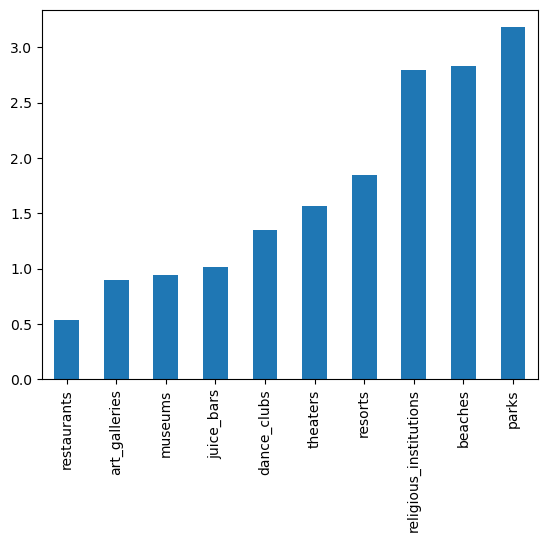

In [7]:
df_raw.mean().sort_values(ascending=True).plot(kind='bar')

## Observations: 
1. Restaurants got worst rating among others
2. Parks are highly rated among others.
3. Restaurants, Art galleries and Museums need to improve.

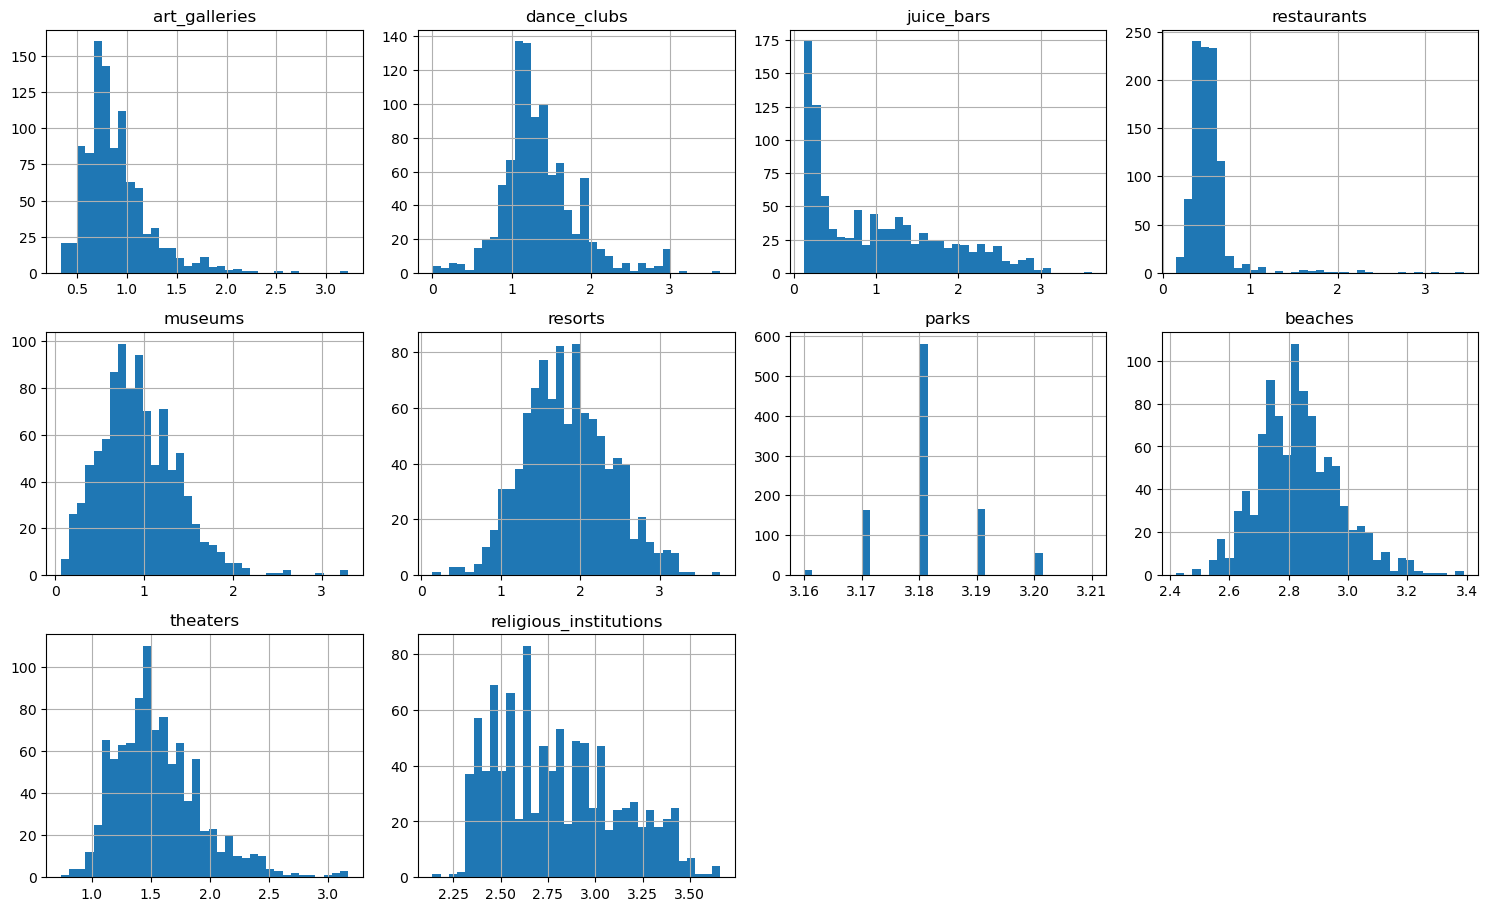

In [8]:
plt.figure(figsize=(15,12))
for value, column in enumerate(df_raw.columns):
    plt.subplot(4,4,value+1)
    df_raw[column].hist(bins=35)
    plt.title(column)
plt.tight_layout()
plt.show()

In [9]:
df_raw.mean(axis=1).sort_values(ascending=True)

User ID
User 979    1.213
User 385    1.305
User 324    1.341
User 542    1.383
User 190    1.389
            ...  
User 813    2.119
User 796    2.130
User 537    2.155
User 667    2.225
User 248    2.225
Length: 980, dtype: float64

<Axes: >

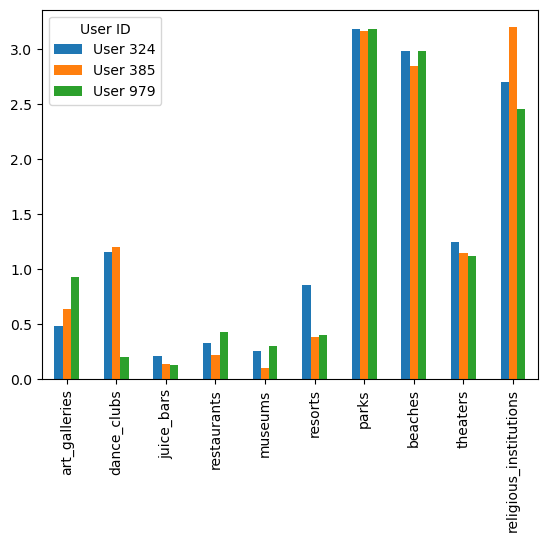

In [10]:
df_raw[df_raw.index.isin(['User 979','User 385', 'User 324'])].T.plot.bar()

## Observations:
1. They all rated lowest for Juice bars.
2. They all rated highest for parks.

In [11]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
df_scaled = scalar.fit_transform(df_raw)

In [12]:
df_scaled

array([[ 0.11264465,  0.93588703,  1.6197497 , ..., -0.32787224,
         0.68751758, -1.18059095],
       [ 0.38808847,  1.77264397,  2.08917107, ..., -1.49205628,
         0.797274  , -1.49190812],
       [ 1.00018585, -1.15600533, -0.60048651, ..., -0.25511074,
        -0.71187679, -0.93153721],
       ...,
       [-0.86671115, -0.06822131, -0.43555468, ..., -0.18234924,
        -0.62955947,  0.68731207],
       [ 0.11264465, -2.41114075, -1.12065614, ...,  1.05459631,
        -1.23321978, -1.05606408],
       [ 0.11264465, -1.6580595 ,  0.14805027, ...,  0.25421978,
        -0.62955947, -1.24285439]])

In [13]:
df_scaled = pd.DataFrame(df_scaled, columns=df_raw.columns)
df_scaled.head()

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks,beaches,theaters,religious_institutions
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010


In [14]:
from sklearn.cluster import KMeans

In [22]:
km = KMeans(n_clusters=3)
km.fit(df_scaled)

KMeans(n_clusters=3)

In [16]:
df_scaled['clusters'] = km.predict(df_scaled)
df_scaled.head()

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks,beaches,theaters,religious_institutions,clusters
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591,0
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908,0
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537,2
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205,1
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010,0


In [17]:
df_scaled['clusters'].value_counts()

clusters
1    340
0    325
2    315
Name: count, dtype: int64

<Axes: xlabel='clusters', ylabel='count'>

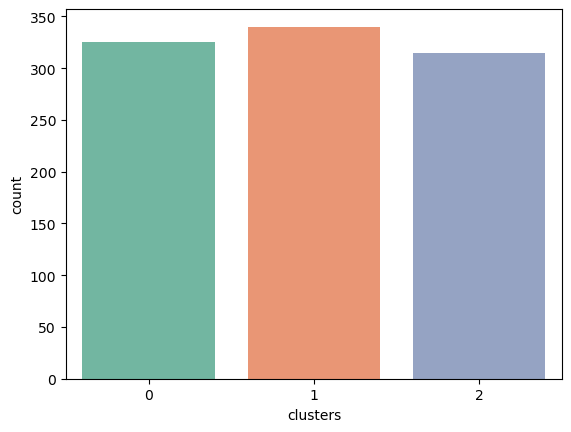

In [18]:
sns.countplot(x=df_scaled['clusters'], palette='Set2')

In [19]:
from sklearn.decomposition import PCA
pca = PCA(2)

df = pca.fit_transform(df_raw)
df.shape

(980, 2)

In [20]:
df_final = pd.DataFrame(df,columns=['Plane-1','Plane-2'])
df_final['label'] = df_scaled['clusters'].tolist()
df_final.head()

,Plane-1,Plane-2,label
0,1.391408,-0.063253,0
1,2.225649,0.660561,0
2,-0.677268,-0.512645,2
3,-0.849739,0.132922,1
4,0.420059,0.202708,0


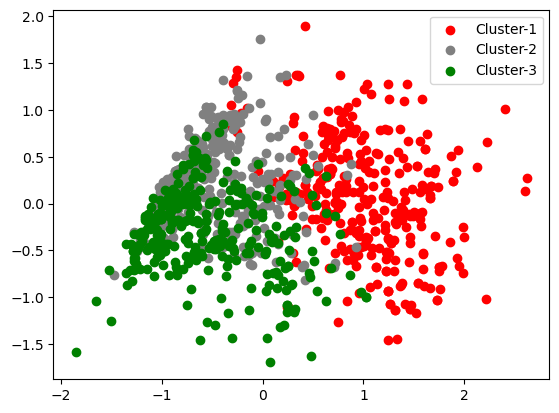

In [21]:
filter_label_0 = df_final[df_final['label'] == 0]
filter_label_1= df_final[df_final['label'] == 1]
filter_label_2 = df_final[df_final['label'] == 2]

plt.scatter(filter_label_0['Plane-1'], filter_label_0['Plane-2'], color='red')
plt.scatter(filter_label_1['Plane-1'], filter_label_1['Plane-2'], color='grey')
plt.scatter(filter_label_2['Plane-1'], filter_label_2['Plane-2'], color='green')
plt.legend(['Cluster-1','Cluster-2','Cluster-3'])
plt.show()

In [28]:
distance = []
for i in range(2,20):
    km = KMeans(n_clusters=i)
    km.fit(df_raw)
    distance.append(km.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

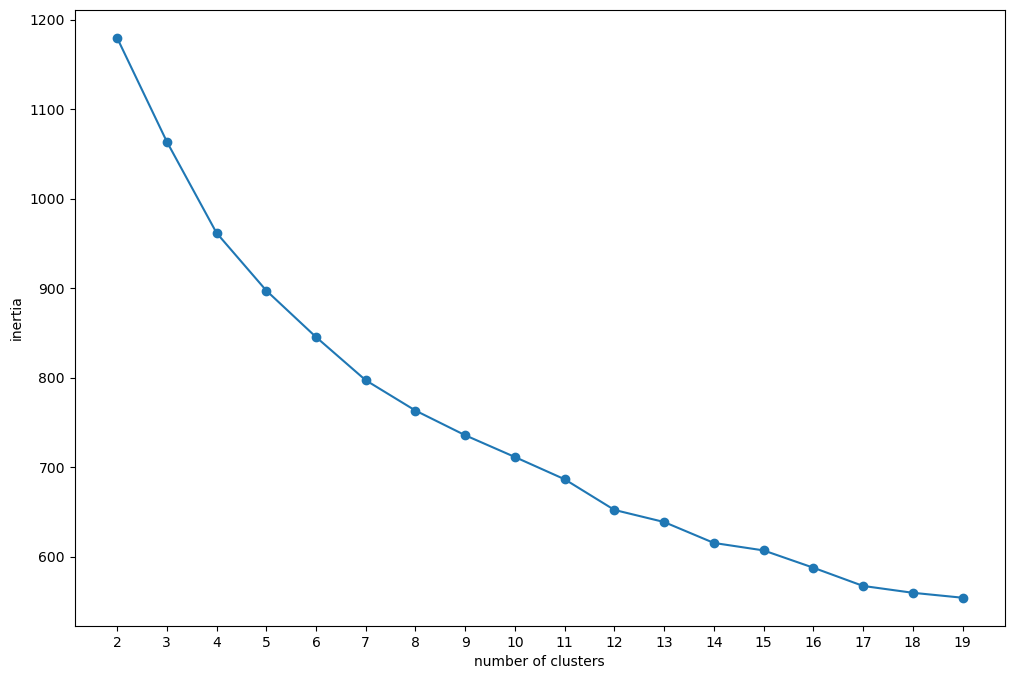

In [33]:
ks = range(2,20)
plt.figure(figsize=(12,8))
plt.plot(ks, distance, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
dbscan = DBSCAN(eps=0.6,
    min_samples=3)
dbscan.fit(df_raw)

DBSCAN(eps=0.6, min_samples=3)

In [36]:
clusters = dbscan.labels_

In [37]:
len(set(clusters))

9

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(df_raw, clusters)

np.float64(-0.17231702464352092)

In [40]:
eps = [0.6,0.8,1]
min_samples = [2,3,4]

In [41]:
for i in eps:
    for j in min_samples:
        print('for eps {0} and min_samples {1}'.format(i,j))
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(df_raw)
        clusters = dbscan.labels_
        print('Clusters:', len(set(clusters)))
        print('Silhoutte score:', silhouette_score(df_raw, clusters))
        print('------------')

for eps 0.6 and min_samples 2
Clusters: 22
Silhoutte score: -0.23430923012354446
------------
for eps 0.6 and min_samples 3
Clusters: 9
Silhoutte score: -0.17231702464352092
------------
for eps 0.6 and min_samples 4
Clusters: 4
Silhoutte score: -0.10383248054659072
------------
for eps 0.8 and min_samples 2
Clusters: 7
Silhoutte score: 0.04067961809560738
------------
for eps 0.8 and min_samples 3
Clusters: 4
Silhoutte score: 0.2250545641442676
------------
for eps 0.8 and min_samples 4
Clusters: 4
Silhoutte score: 0.17779815923280345
------------
for eps 1 and min_samples 2
Clusters: 5
Silhoutte score: 0.2088011649161973
------------
for eps 1 and min_samples 3
Clusters: 5
Silhoutte score: 0.2088011649161973
------------
for eps 1 and min_samples 4
Clusters: 2
Silhoutte score: 0.3387970749425855
------------


In [42]:
import scipy.cluster.hierarchy as sch

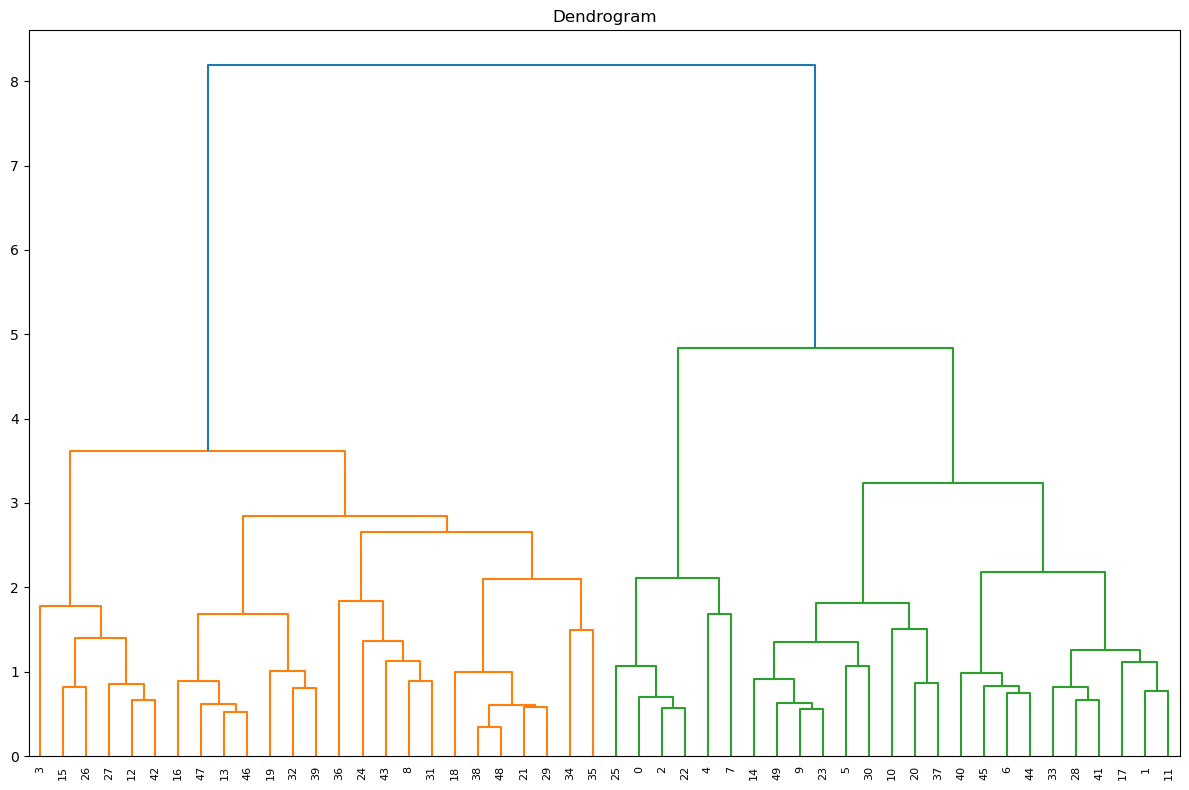

In [50]:
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(df_raw.sample(50), method='ward'))
plt.title('Dendrogram')
plt.tight_layout()
plt.show()